<a href="https://colab.research.google.com/github/neethipoonacha/EIP/blob/master/Fourth_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

install keras pip - package management system from anaconda

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


import libraries and modules import numpy - for reproducing results from the result set import Sequential - for feed forward of linear stack of neural network layers import Flatten - core layers of keras import Convolution2D - convolutional layers that will help efficiently train on image data import np_utils - utitlities to transform data import mnist - libraries to import datasets


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, BatchNormalization
from keras.layers import Concatenate

from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Load image data from MNIST data from - https://s3.amazonaws.com/img-datasets/mnist.npz

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

There are 6000 samples with 28*28 resolution each .The first to fifth sample is plotted here
As we can see for all images that egdges are blank and do not count .So the images fall in the (5,25) range

(60000, 28, 28)


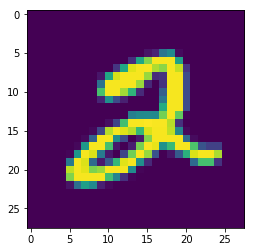

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
plt.imshow(X_train[1])
plt.imshow(X_train[2])
plt.imshow(X_train[3])
plt.imshow(X_train[4])
plt.imshow(X_train[5])

Preprocess input data for keras RGB images have a depth of 3 . minst images have a depth of 1 . explictly mentioning to process the data and to transform dataset from having shape (n, width, height) to (n, depth, width, height).

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

convert our data type to float32 and normalize our data values to the range [0, 1].

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

The 10 different classes are represented as a single 1-dimensional array

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

The y_train and y_test data are split into 10 distinct class labels

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) The input shape parameter should be the shape of 1 sample corresponding to the (depth, width, height) of each digit image here it is 28*28
The first 3 params(32, 3, 3) represent the no of filters = 32 the size of the kernel(no of rows and no of col) =3, 3 step size is (1,1) by default.
After this add more layers to the module MaxPooling2D = to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter Flatten = flattened convolution layers to 1-dimensional

In [123]:
from keras.layers import Activation, MaxPooling2D
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))#26
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu'))  #24
model.add(BatchNormalization())

model.add(Convolution2D(20, 3, 3, activation='relu')) #22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #11

model.add(Convolution2D(20, 3, 3, activation='relu'))#9
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu'))#7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu'))#7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


Restricted to 13K params by adding batchnormaisation after each convolution layer and adding maxpooling after edge detection



Tried to stay at 15k Params by the below 



name         size                      parameters
---  --------  -------------------------    ------------------------
0	input					1x28x28					0
1	conv2d1   (28-(3-1))=26 10*26*26		(3*3*1)*10  		=  100
batchnormalisation 
2	conv2d1   (26-(3-1))=24 20*24*24        (3*3*10)*10         = 900
batchnormalisation 
3 conv2d1   (24-(3-1))=22 30*22*22        (3*3*10) *20        = 1800 
batchnormalisation 


In [124]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_263 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_223 (Bat (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_224 (Bat (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_265 (Conv2D)          (None, 22, 22, 20)        1820      
_________________________________________________________________
batch_normalization_225 (Bat (None, 22, 22, 20)        80        
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 11, 11, 20)        0         
__________

compile and run the model with loss function categorical_crossentropy and optimizer = adam


The change here is to 

-   Adding callback to set the learning rate scheduled as per the progress per epoch 

In [128]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 20s 336us/step - loss: 0.0344 - acc: 0.9889 - val_loss: 0.0371 - val_acc: 0.9894
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 10s 165us/step - loss: 0.0224 - acc: 0.9929 - val_loss: 0.0335 - val_acc: 0.9892
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 10s 164us/step - loss: 0.0168 - acc: 0.9944 - val_loss: 0.0345 - val_acc: 0.9900
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 10s 164us/step - loss: 0.0130 - acc: 0.9957 - val_loss: 0.0333 - val_acc: 0.9905
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

Fit the training data by adding the batch size ( create 64 batches with each batch having one feature each) and run it for 10 epochs(iterations of back forth of entire data set)

Batch size increased to 64
Epochs increased to 30

Increasing the batch size increases the number of classes in each epoch

Evaluate the model on the test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

print the accuracy of prediction

In [131]:
print(score)

[0.03385149991993555, 0.9935]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.22055195e-14 3.64051669e-15 2.09077089e-09 1.05266444e-08
  3.32061162e-16 3.42179085e-14 3.15399350e-24 1.00000000e+00
  2.54245908e-12 7.90756738e-10]
 [1.46266710e-09 5.23258260e-12 1.00000000e+00 3.16496044e-17
  3.64782733e-16 1.09991023e-18 2.84261519e-13 6.85450891e-17
  1.77549964e-14 7.27784315e-19]
 [1.85546529e-08 9.99990821e-01 6.76190481e-08 7.01369856e-07
  2.13387366e-07 3.91330310e-08 5.14877696e-09 6.86768817e-06
  6.73876741e-08 1.22196661e-06]
 [9.99999523e-01 4.14929635e-15 7.04568189e-15 2.84538587e-13
  4.75375924e-13 6.57758743e-12 4.92824938e-07 1.38975298e-11
  1.34983934e-11 1.11062340e-10]
 [3.24480349e-16 2.35930572e-16 1.64661503e-12 3.17572086e-19
  1.00000000e+00 8.78780933e-17 1.60537775e-13 1.96616019e-15
  8.24111504e-13 1.18850574e-08]
 [8.73960886e-08 9.99976993e-01 1.45292290e-07 1.87749993e-09
  7.71120625e-08 5.29368416e-09 9.08083220e-10 2.17154611e-05
  1.00406288e-08 9.10959102e-07]
 [1.81952484e-22 1.66721595e-12 1.39253509e-09 5.85757441e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored